In [94]:
import os
import math
import random
import warnings
import numpy as np
import pandas as pd 
from sklearn import metrics
from matplotlib import pyplot as plt
import seaborn as sns
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv(r"C:\Workplace\C++\temp_sol_dev\test\d2ome_restructure\d2ome_GUI\d2ome_GUI\v2\bin\Release\Estimated_neh_numbers_liverpool_liver_.csv")

In [16]:
prot_count=pd.DataFrame(np.unique(data.Protein,return_counts=True)).transpose()
prot_count.columns=['Protein','Pep_count']
prot_count=prot_count.sort_values(by='Pep_count',ascending=False)
# prot_count.head(30)

In [83]:
temp_data=data[data.Protein=='CPSM_MOUSE']
temp_data=temp_data[temp_data.APE_RMSE<0.01]

In [97]:
# normal=[x for x in temp_data.Peptide if (not ('S' in x or 'P' in x or 'H' in x)) ]
# under_estimate=[x for x in temp_data.Peptide if  ('S' in x or 'P' in x or 'H' in x)  ]
normal=[x for x in temp_data.Peptide if (not ('R' in x or 'D' in x )) ]
under_estimate=[x for x in temp_data.Peptide if  ('R' in x or 'D' in x )  ]

In [98]:
temp_data_normal=temp_data.query(f'Peptide in {normal}')
temp_data_under_estimate=temp_data.query(f'Peptide in {under_estimate}')

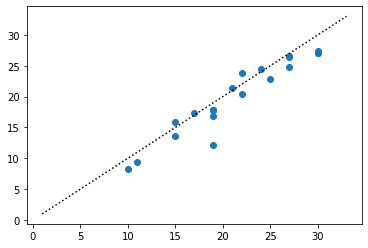

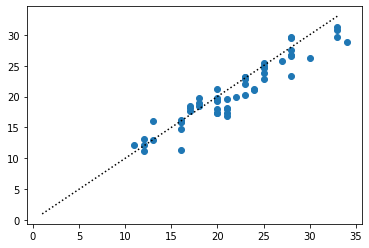

<AxesSubplot:xlabel='two_param_k', ylabel='Density'>

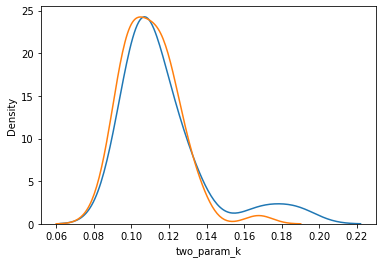

In [99]:
# plt.scatter(temp_data_normal.two_param_k,temp_data_normal.T_NEH -temp_data_normal.APE_NEH)
# plt.scatter(temp_data_under_estimate.two_param_k,temp_data_under_estimate.T_NEH- temp_data_under_estimate.APE_NEH)

plt.scatter(temp_data_normal.T_NEH ,temp_data_normal.APE_NEH)
plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='k')
plt.show()

plt.scatter(temp_data_under_estimate.T_NEH, temp_data_under_estimate.APE_NEH)
plt.plot(range(1,max(temp_data.T_NEH)) , range(1,max(temp_data.T_NEH)) ,ls=':' ,c='k')
plt.show()

sns.kdeplot(temp_data_normal.two_param_k, bw=0.5)
sns.kdeplot(temp_data_under_estimate.two_param_k,bw=0.5)

In [87]:
temp_data_normal.columns

Index(['Protein', 'Peptide', 'Charge', 'T_NEH', 'Asym_NEH', 'MPE_NEH',
       'APE_NEH', 'Asym_RMSE', 'MPE_RMSE', 'APE_RMSE', 'sd_neh', 'sd_rmse',
       'il_neh', 'il_rmse', 'i0_0', 'i1_0', 'i2_0', 'i0_31', 'i1_31', 'i2_31',
       'two_param_k'],
      dtype='object')

In [66]:
temp_data_normal

,Protein,Peptide,Charge,T_NEH,Asym_NEH,MPE_NEH,APE_NEH,Asym_RMSE,MPE_RMSE,APE_RMSE,...,sd_rmse,il_neh,il_rmse,i0_0,i1_0,i2_0,i0_31,i1_31,i2_31,two_param_k
1471,CPSM_MOUSE,LFAEAVQK,2,17,17.436101,17.4523237239701,17.399994,0.000997,0.000982,0.001385,...,0.003078,18,0.001602,0.58048,0.30333,0.09165,0.255413,0.350360,0.239695,0.130738
1472,CPSM_MOUSE,IITGLAAGAK,2,19,12.582878,11.5384581305472,12.199993,0.003134,0.005185,0.001360,...,0.001953,12,0.002413,0.58419,0.30152,0.09032,0.328453,0.366444,0.202449,0.168672
1598,CPSM_MOUSE,AVNTLNEALEFAN,2,27,27.519013,28.0375671796743,24.800022,0.011891,0.013916,0.005686,...,0.006946,24,0.005973,0.44676,0.34204,0.14888,0.140446,0.271883,0.279771,0.101523


In [67]:
temp_data_under_estimate

,Protein,Peptide,Charge,T_NEH,Asym_NEH,MPE_NEH,APE_NEH,Asym_RMSE,MPE_RMSE,APE_RMSE,...,sd_rmse,il_neh,il_rmse,i0_0,i1_0,i2_0,i0_31,i1_31,i2_31,two_param_k
1473,CPSM_MOUSE,NLAVPLYK,2,11,10.022577,8.80444686486268,9.399996,0.005005,0.005568,0.001793,...,0.004012,10,0.002746,0.56869,0.31005,0.09546,0.364230,0.368502,0.185763,0.102368
1479,CPSM_MOUSE,TFEESFQK,2,15,16.412306,16.7200238629184,15.799990,0.003395,0.005152,0.001606,...,0.005919,16,0.002683,0.55009,0.31277,0.10494,0.262051,0.345252,0.235966,0.108419
1480,CPSM_MOUSE,GTTITSVLPK,2,10,8.454702,12.6469220006871,8.199997,0.006022,0.034652,0.005393,...,0.010939,7,0.008182,0.55424,0.31204,0.10290,0.380972,0.349980,0.185107,0.103414
1485,CPSM_MOUSE,QNLIAEVSTK,2,19,18.009732,19.1303000661457,17.799995,0.002538,0.008155,0.002407,...,0.004839,17,0.003326,0.53534,0.31790,0.11101,0.235065,0.335243,0.250464,0.112953
1490,CPSM_MOUSE,IALGIPLPEIK,2,19,17.436561,15.6863661563429,16.799992,0.006293,0.008467,0.005122,...,0.006832,16,0.006144,0.48840,0.33805,0.12895,0.224467,0.331173,0.242611,0.107632
1493,CPSM_MOUSE,SLGQWLQEEK,2,22,22.978148,23.1293688777928,23.800018,0.007130,0.006713,0.005194,...,0.010074,22,0.009182,0.49212,0.33290,0.12864,0.166642,0.291977,0.260449,0.128404
1497,CPSM_MOUSE,VSQEHPVVLTK,3,19,19.270997,18.6955944380157,17.799995,0.007545,0.004703,0.002176,...,0.005288,17,0.004386,0.48536,0.33604,0.13115,0.212497,0.323241,0.254516,0.101414
1498,CPSM_MOUSE,VSQEHPVVLTK,2,19,19.385656,16.1645232176508,17.799995,0.008629,0.009809,0.002532,...,0.002793,19,0.005337,0.48536,0.33604,0.13115,0.207841,0.331071,0.254180,0.104951
1499,CPSM_MOUSE,QAFITAQNHGY,2,24,22.948508,23.960526958617,24.400021,0.010861,0.008732,0.007732,...,0.013336,22,0.012528,0.47920,0.33793,0.13376,0.159328,0.284150,0.260718,0.128521
1500,CPSM_MOUSE,IASVQTNEVGLK,2,21,22.728865,21.5298397035177,21.400009,0.006633,0.002219,0.003361,...,0.004610,22,0.004104,0.48831,0.33314,0.13054,0.177369,0.309989,0.269883,0.102264
